Training Part

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop,SGD
from keras.applications.vgg19 import VGG19
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.resnet_v2 import ResNet50V2  
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet169
import matplotlib.pylab as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau
from keras.models import Model
from keras.layers import Input, Dense

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import math
from keras.callbacks import ModelCheckpoint

from keras.applications.resnet import ResNet101

import tensorflow as tf

tf.keras.backend.clear_session()
#import tensorflow 
#summary_writer = tensorflow.train.SummaryWriter('/logdir', sess.graph_def)

#tb_callbacks = TensorBoard(log_dir='/logdir', histogram_freq=0, write_graph=True, write_images=True)

# create the base pre-trained model
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(67, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)


for layer in model.layers[:549]:
   layer.trainable = False
for layer in model.layers[549:]:
   layer.trainable = True
   
   
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
#model.compile(SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

modelcheck = ModelCheckpoint(filepath='InceptionResNetV2.h5', monitor='loss', verbose=1, save_best_only=True)


# preprocess input data
train_data_dir = 'D:\\indoorCVPR_09\\Images'
img_width = 224
img_height = 224
batch_size = 32
nb_epochs = 3000
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    #vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    fill_mode='nearest',
    validation_split=0.1) 
    # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data
#model_checkpoint = ModelCheckpoint(path='vgg16.h5', monitor='val_loss', save_best_only=True)
# Start training
tsteps= math.ceil(14088/batch_size)
vsteps= math.ceil(1532/batch_size)
history = model.fit(
    train_generator,
    steps_per_epoch =tsteps,
    validation_data = validation_generator, 
    validation_steps =vsteps, epochs = nb_epochs, callbacks=[modelcheck])

# Saving model
model.save('InceptionResNetV2.h5')
model.save_weights('InceptionResNetV2_w.h5')


Evaluation Part or Testing Part

--- 6.4896323680877686 seconds ---
laboratorywet
restaurant_kitchen


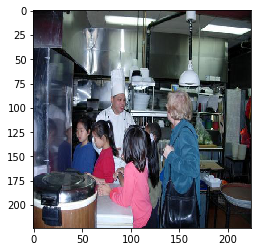

In [21]:
from keras.models import load_model
model = load_model('InceptionResNetV2.h5')


dict = train_generator.class_indices



import time
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
test_image = image.load_img('C:\\Users\\chrng\\OneDrive\\Desktop\\res\\restaurentkitcjhen.jpg', target_size = (224, 224))
test = test_image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = preprocess_input(test_image) 
start_time = time.time()
result = model.predict(test_image)

print("--- %s seconds ---" % (time.time() - start_time))
for i in range (0,dict.__len__()):
    if result[0][i] >= 0.05:
        listOfKeys = [key  for (key, value) in dict.items() if value == i]
        for key  in listOfKeys:
            plt.imshow(test)
            print(key) 
            break